In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import requests
import plotly.graph_objects as go
import talib

In [2]:
def visualize(df, title="TSLA Candlestick Chart"):
    """
    Plots a candlestick chart using mplfinance for the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing OHLC data.
    title (str): The title of the chart.
    """
    # Ensure the DataFrame index is a datetime index
    df = df.copy()
    df.index = pd.to_datetime(df.index)

    # Plot the candlestick chart
    mpf.plot(df, type='candle', style='charles', title=title, ylabel="Price",
             volume=True, figsize=(10, 5))

def visualize_interactive(df, title="TSLA Candlestick Chart"):
    """
    Plots an interactive candlestick chart using Plotly.

    Parameters:
    df (pd.DataFrame): The DataFrame containing OHLC data.
    title (str): The title of the chart.
    """
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='TSLA'
    )])

    fig.update_layout(title=title, xaxis_rangeslider_visible=False)
    fig.show()

def get_tsla_recent_data():
    session = requests.Session()
    session.headers.update({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'})
    tsla = yf.Ticker('TSLA')
    df = tsla.history(period='4mo', interval='1d')
    return df

def detect_engulfing_pattern(tsla_df):
    tsla_df['Engulfing'] = ta.cdl_pattern(tsla_df['Open'], tsla_df['High'], tsla_df['Low'], tsla_df['Close'], name="engulfing")
    return tsla_df

def visualize_engulfing_pattern(tsla_df):
    # Create the candlestick chart
    fig = go.Figure(data=[go.Candlestick(
        x=tsla_df.index,
        open=tsla_df['Open'],
        high=tsla_df['High'],
        low=tsla_df['Low'],
        close=tsla_df['Close'],
        name='TSLA'
    )])

    # Highlight Engulfing Patterns
    engulfing_candles = tsla_df[tsla_df['Engulfing'] != 0]
    
    # Separate Bullish and Bearish Engulfing Patterns
    bullish_engulfing = tsla_df[tsla_df['Engulfing'] == 100]
    bearish_engulfing = tsla_df[tsla_df['Engulfing'] == -100]
    
    # Mark Bullish Engulfing Patterns (Green Triangle-Up)
    fig.add_trace(go.Scatter(
        x=bullish_engulfing.index,
        y=bullish_engulfing['High']+10,
        mode='markers',
        marker=dict(size=10, color='green', symbol='triangle-up'),
        name='Bullish Engulfing'
    ))

    # Mark Bearish Engulfing Patterns (Red Triangle-Down)
    fig.add_trace(go.Scatter(
        x=bearish_engulfing.index,
        y=bearish_engulfing['High']+10,
        mode='markers',
        marker=dict(size=10, color='red', symbol='triangle-down'),
        name='Bearish Engulfing'
    ))

    # Chart Layout
    fig.update_layout(
        title="TSLA Candlestick Chart with Engulfing Patterns",
        xaxis_title="Date",
        yaxis_title="Price",
        xaxis_rangeslider_visible=False
    )

    # Show the figure
    fig.show()

In [3]:
tsla_data = get_tsla_recent_data()

In [4]:
tsla_data.to_csv("engulfing_patterns.csv", index=True)  # Saves with index (Date)

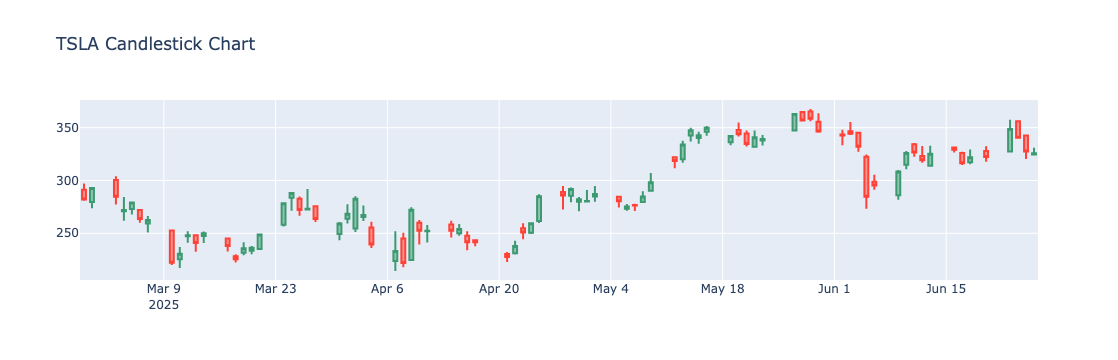

In [5]:
#visualize(tsla_data)
visualize_interactive(tsla_data)

In [6]:
#Run the function and get Engulfing Pattern data
engulfing_patterns = detect_engulfing_pattern(tsla_data)

engulfing_df = engulfing_patterns[engulfing_patterns['Engulfing'] != 0]
engulfing_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Engulfing
Date,,,,,,,,
2025-03-13 00:00:00-04:00,248.130005,248.289993,232.600006,240.679993,114813500,0.0,0.0,-100.0
2025-03-28 00:00:00-04:00,275.579987,276.100006,260.570007,263.549988,123809400,0.0,0.0,-100.0
2025-04-08 00:00:00-04:00,245.000000,250.440002,217.800003,221.860001,171603500,0.0,0.0,-100.0
2025-04-24 00:00:00-04:00,250.500000,259.540009,249.199997,259.510010,94464200,0.0,0.0,100.0
2025-04-29 00:00:00-04:00,285.500000,293.320007,279.470001,292.029999,108906600,0.0,0.0,100.0
2025-06-09 00:00:00-04:00,285.959991,309.829987,281.850006,308.579987,140908900,0.0,0.0,100.0
2025-06-13 00:00:00-04:00,313.970001,332.989990,313.299988,325.309998,128964300,0.0,0.0,100.0


### Displaying markers

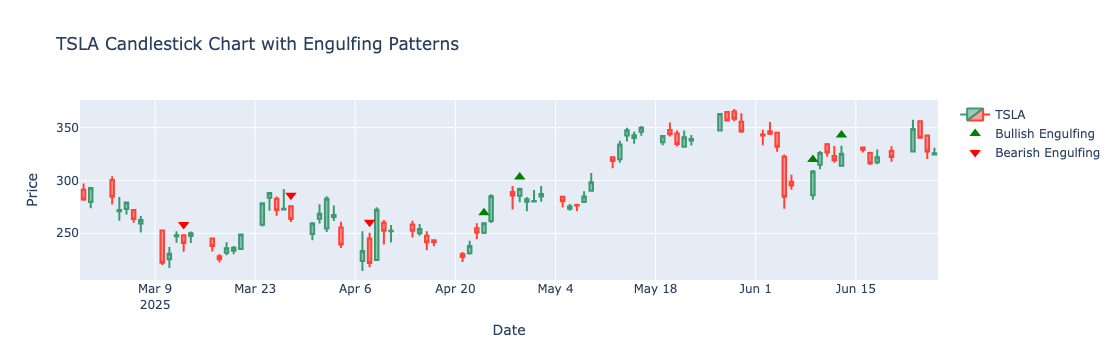

In [7]:
visualize_engulfing_pattern(tsla_data)